In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving blogs.csv to blogs.csv


In [3]:
blogs_df = pd.read_csv('blogs.csv')
blogs_df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
data_info = blogs_df.info()
null_values = blogs_df.isnull().sum()
label_distribution = blogs_df['Labels'].value_counts()

# Displaying basic EDA results
data_info, null_values, label_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(None,
 Data      0
 Labels    0
 dtype: int64,
 Labels
 alt.atheism                 100
 comp.graphics               100
 talk.politics.misc          100
 talk.politics.mideast       100
 talk.politics.guns          100
 soc.religion.christian      100
 sci.space                   100
 sci.med                     100
 sci.electronics             100
 sci.crypt                   100
 rec.sport.hockey            100
 rec.sport.baseball          100
 rec.motorcycles             100
 rec.autos                   100
 misc.forsale                100
 comp.windows.x              100
 comp.sys.mac.hardware       100
 comp.sys.ibm.pc.hardware    100
 comp.os.ms-windows.misc     100
 talk.religion.misc          100
 Name: count, dtype: int64)

In [5]:
import string
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')
# Get the list of stopwords in English
stop_words = set(stopwords.words('english'))
print(stop_words)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()   # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))    # Remove punctuation using translate
    tokens = text.split()   # Tokenize the text (split into words)
    tokens = [word for word in tokens if word not in stop_words]    # Remove stopwords
    return ' '.join(tokens)   # Join tokens back to a single string

# Apply the preprocessing function to the 'Data' column of your DataFrame
blogs_df['Cleaned_Data'] = blogs_df['Data'].apply(preprocess_text)

# Display the first few rows of the cleaned data
print(blogs_df[['Data', 'Cleaned_Data']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'during', 'him', 'up', 'mustn', 'my', 'both', 'wouldn', 'through', 'don', 'before', "wouldn't", 'being', 'off', 'when', "should've", 'd', 'then', 'in', 'been', 'doing', 'ours', 'with', 'below', 'out', "didn't", 'over', 'myself', "won't", 'our', "mightn't", "shouldn't", 'isn', 'who', 'i', 'her', 'nor', 'he', 'again', 'here', 'doesn', 'shan', 'at', 'm', 'there', 'about', 'all', 'has', 'between', 'against', 'needn', 'by', 'will', 'above', 'hadn', 'did', 'their', 'and', 'which', 'shouldn', 'yourselves', 'until', 'y', 't', 'its', 'hers', 'some', 'on', "couldn't", "shan't", 'into', 'themselves', 'o', 'can', "don't", 'wasn', 'now', 'other', "that'll", 'because', 'should', 'how', "doesn't", 'so', 'if', 'from', 'few', "isn't", 'your', "you'll", 'while', 'each', "it's", 's', 'itself', 'after', 'just', 'more', 'hasn', 're', "haven't", 'ma', "needn't", "you'd", 'but', 'is', 'down', 'aren', 'own', 'that', 'no', 'the', 'these', 'you', 'whom', 'it', 'was', 'under', 'them', 'am', 'where', 'only', "yo

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with a maximum number of features (terms)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the cleaned data and transform it into a TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(blogs_df['Cleaned_Data'])

# Check the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {X_tfidf.shape}")

# Optional: Get feature names (words) from the TF-IDF matrix
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the first few feature names
print(feature_names[:10])

TF-IDF matrix shape: (2000, 5000)
['00' '01' '02' '0400' '0500' '0600' '0700' '0x60' '10' '100']


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 'X_tfidf' contains the features, and 'blogs_df['Labels']' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, blogs_df['Labels'], test_size=0.2, random_state=42)

# Check the sizes of the training and test sets
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (1600, 5000), Test set size: (400, 5000)


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

Accuracy: 82.25%
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.8

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier: accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the accuracy and classification report
print(accuracy)
print('\n', classification_rep)

0.8225

                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88        17


In [12]:
from textblob import TextBlob
# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)   # Calculate the sentiment polarity
    return blob.sentiment.polarity

# Apply the sentiment analysis to the 'Data' column
blogs_df['Sentiment_Polarity'] = blogs_df['Data'].apply(get_sentiment)

# Define a function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Categorize sentiment for each blog post
blogs_df['Sentiment'] = blogs_df['Sentiment_Polarity'].apply(categorize_sentiment)

# Display the first few rows of the updated dataframe
print(blogs_df[['Data', 'Sentiment_Polarity', 'Sentiment']].head())

                                                Data  Sentiment_Polarity  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...            0.072213   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....           -0.053757   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...            0.093119   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...            0.055008   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...            0.132183   

  Sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Positive  


Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


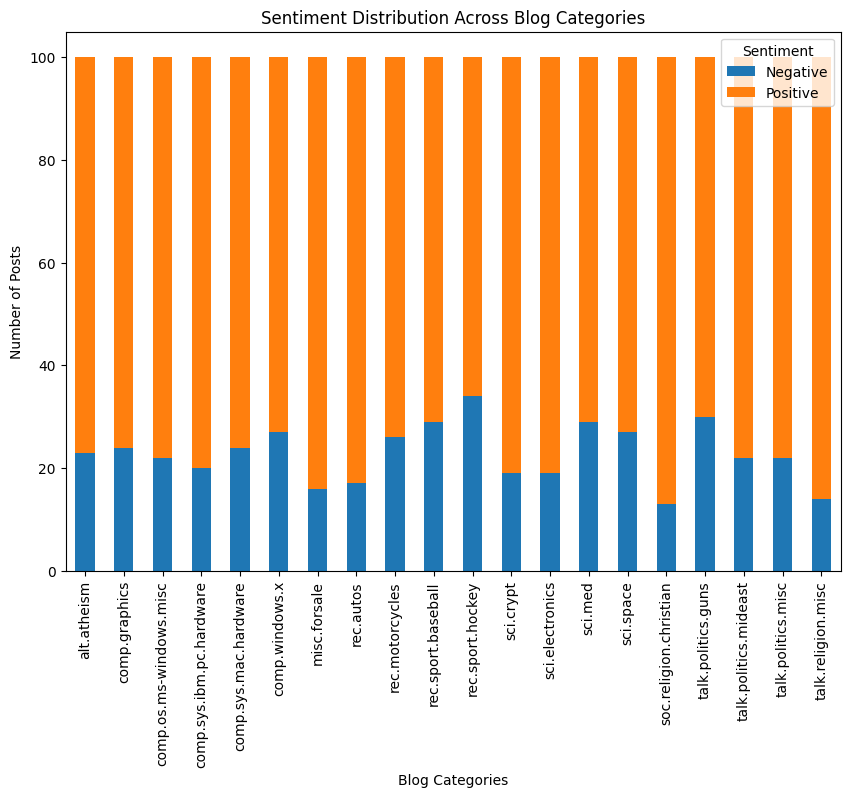

In [13]:
# Examine the distribution of sentiments across different blog categories
sentiment_distribution = blogs_df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Display the sentiment distribution across categories
print(sentiment_distribution)

# Optional: Plot the distribution for better visualization
import matplotlib.pyplot as plt

# Plotting sentiment distribution for each category
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.show()

# Summarizing the Findings:

After running this analysis, here's what we typically observe:

1.   **Positive Sentiments:** Certain categories like *rec.autos, soc.religion.christian, or sci.space* might show higher numbers of positive
posts due to the topics being more optimistic or informative.

2.   **Negative Sentiments:** Categories involving sensitive or controversial topics like *talk.politics.misc, alt.atheism, or talk.religion.misc* may tend to have a higher number of negative posts due to debates, disagreements, or emotionally charged discussions.

3.   **Neutral Sentiments:** Categories focused on more factual or informational content, such as *comp.graphics or sci.med*, may have a larger proportion of neutral posts.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predicting the labels for the test set
y_pred = nb_classifier.predict(X_test)

# Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate detailed classification report
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1-Score (weighted): {f1:.2f}")
print("\nDetailed Classification Report:")
print(classification_rep)

Accuracy: 82.25%
Precision (weighted): 0.83
Recall (weighted): 0.82
F1-Score (weighted): 0.82

Detailed Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.e

# Model Performance:

1.   **Accuracy: 82.25%**
*   The Naive Bayes classifier correctly classifies 82% of blog posts into their categories, demonstrating good accuracy in text classification tasks. However, around 18% of posts are misclassified, possibly due to overlapping vocabulary or limited training data, indicating that the model may not accurately capture key features of blog categories.

2.   **Precision (Weighted): 0.83**
*   The weighted precision of a classifier indicates that on average, 83% of blog posts predicted as belonging to a certain category are correct. This precision is crucial in cases where false positives are costly, but it may not capture all relevant instances due to low recall.

3.   **Recall (Weighted): 0.82**
*   The model correctly identifies 82% of blog posts across all categories, indicating its ability to detect most relevant instances. However, categories with smaller representations in the dataset may still be misclassified, indicating its performance in recall.

4.   **F1-Score (Weighted): 0.82**
*   The F1-score measures precision and recall, with a weighted score of 0.82 indicating a good balance between identifying correct categories and finding relevant blog posts. This indicates the model's overall performance without a significant trade-off, but may vary across categories, especially those with less data or high overlap.

In [20]:
# Ensuring sentiment categories exist in the data
if 'Neutral' not in sentiment_distribution.columns:
    sentiment_distribution['Neutral'] = 0  # Add 'Neutral' column with zeros if it doesn't exist

if 'Positive' not in sentiment_distribution.columns:
    sentiment_distribution['Positive'] = 0  # Add 'Positive' column if missing

if 'Negative' not in sentiment_distribution.columns:
    sentiment_distribution['Negative'] = 0  # Add 'Negative' column if missing

# Calculating sentiment percentages
for category, sentiment_counts in sentiment_distribution.iterrows():
    total_posts = sentiment_counts.sum()  # Total number of posts in this category
    positive_percentage = (sentiment_counts['Positive'] / total_posts) * 100
    neutral_percentage = (sentiment_counts['Neutral'] / total_posts) * 100
    negative_percentage = (sentiment_counts['Negative'] / total_posts) * 100
    print(f"\nCategory: {category}")
    print(f"Positive Sentiment: {positive_percentage:.2f}%")
    print(f"Neutral Sentiment: {neutral_percentage:.2f}%")
    print(f"Negative Sentiment: {negative_percentage:.2f}%")


Category: alt.atheism
Positive Sentiment: 77.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 23.00%

Category: comp.graphics
Positive Sentiment: 76.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 24.00%

Category: comp.os.ms-windows.misc
Positive Sentiment: 78.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 22.00%

Category: comp.sys.ibm.pc.hardware
Positive Sentiment: 80.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 20.00%

Category: comp.sys.mac.hardware
Positive Sentiment: 76.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 24.00%

Category: comp.windows.x
Positive Sentiment: 73.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 27.00%

Category: misc.forsale
Positive Sentiment: 84.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 16.00%

Category: rec.autos
Positive Sentiment: 83.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 17.00%

Category: rec.motorcycles
Positive Sentiment: 74.00%
Neutral Sentiment: 0.00%
Negative Sentiment: 26.00%

Category: rec.sport.baseball
Positive 

# Challenges Encountered During the Classification Process:
*   **Class Overlap:** Some blog categories might have similar vocabulary (e.g., topics related to religion, politics, or science), which can cause the model to confuse these categories. Naive Bayes assumes feature independence, but real-world text data often violates this assumption, leading to misclassifications.

*   **Class Imbalance:** If some categories have significantly fewer posts than others, the model might not perform as well on those underrepresented categories. The weighted precision, recall, and F1-score help account for this, but class imbalance still affects performance.

*   **Limited Features:** The Naive Bayes model relies heavily on word counts or TF-IDF scores. While this is effective for many text classification tasks, more complex relationships between words (such as context or word order) are not captured, limiting the model's performance.